In [1]:
from IPython import get_ipython
get_ipython().run_line_magic("reset","-f")

from PyPackageJonas import *

delta_t = 0.001

figures_path = "C:/Users/jonas/Git/Analysis-of-Production-flow-systems-with-focus-on-industry/Latex Thesis/figures/"

In [86]:
G_obs = np.load("G_obs_large_MI.npy")
G_obs_labels = np.load("G_obs_large_MI_labels.npy", allow_pickle= True)
d = G_obs.shape[0]

In [87]:
# reorder the variables
my_order = [9,8,7,6,5,4,3,2,1,0] + [10,11,12,13,14,15,16,17,18,19] + [20,21,22,23,24,25,26,27,28,29] + [34,33,32,31,30] + [35,36,37,38,39,40,41,42,43,44,45,46] + [47,48,49,50,51,52,53,54,55,56,57]

In [88]:
G_obs_labels = G_obs_labels[my_order]
G_obs = G_obs[my_order,:][:,my_order]

In [177]:
idx_T_delay = np.arange(0,10,1)
idx_T_production = np.arange(10,20,1)
idx_T = np.arange(20,29,1)
idx_T_total = np.arange(29,30,1)


idx_M_delay = np.arange(30,35,1)
idx_M_production = np.arange(35,47,1)
idx_M = np.arange(47,57,1)
idx_M_total = np.arange(57,58,1)

In [178]:
# G_obs_labels[idx_M_total]

array(['M_total'], dtype=object)

In [90]:
def map_fun(label):
    if label.startswith("T_delay"):
        return '$T^D_{' + f"{label[8:]}" + '}$'

    if label.startswith("T_production"):
        return '$T^P_{' + f"{label[13:]}" + '}$'
    
    if label == "T_total":
        return '$T^T$'
    
    if label[0] == "T":
        return '$T^T_{' + f"{label[2:]}" + '}$'


    if label.startswith("M_delay"):
        return '$M^D_{' + f"{label[8:]}" + '}$'

    if label.startswith("M_production"):
        return '$M^P_{' + f"{label[13:]}" + '}$'
    
    if label == "M_total":
        return '$M^T$'
    
    if label[0] == "M":
        return '$M^T_{' + f"{label[2:]}" + '}$'

    return label


G_obs_labels_latex = list(map(lambda x : map_fun(x), G_obs_labels))

In [91]:
np.fill_diagonal(G_obs,0)

G_obs[G_obs < 0] = 0

In [179]:
np.linalg.eig(G_obs).eigenvalues.min()

-1.075923067867458

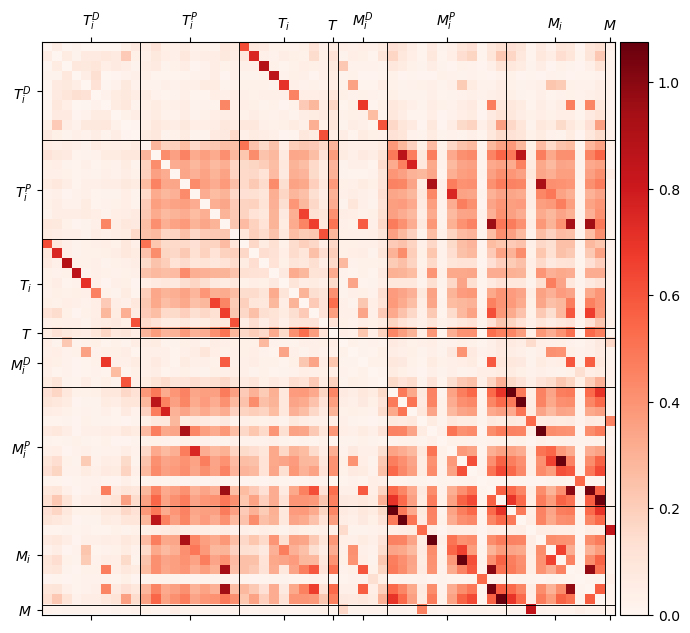

In [320]:

fig, ax = plt.subplots(1,1,figsize=(7,7))
r = ax.matshow(G_obs, cmap = "Reds", vmin=0, aspect = "equal")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

labels_select = G_obs_labels

plt.colorbar(r, cax=cax)

bs = [0,10,20,29,30,35,47,57,58]
for idx1, b1 in enumerate(bs[:-1]):
    for idx2, b2 in enumerate(bs[:-1]):
        ax.add_patch(plt.Rectangle((b1-0.5, b2-0.5), bs[idx1+1] - b1,bs[idx2+1] - b2,fill = False,linewidth=.5))


centers = np.array(bs)
centers = (centers[1:] + centers[:-1])/2 -.5
ax.set_xticks(centers, ['$T^D_i$', '$T^P_i$', '$T_i$', '$T$','$M^D_i$', '$M^P_i$', '$M_i$', '$M$']);
ax.set_yticks(centers, ['$T^D_i$', '$T^P_i$', '$T_i$', '$T$','$M^D_i$', '$M^P_i$', '$M_i$', '$M$']);

fig.tight_layout()

# plt.savefig(figures_path + "Cycle data/G_obs complete - symmetric.pdf", bbox_inches='tight')
# plt.savefig(figures_path + "Cycle data/G_obs complete - symmetric.png", bbox_inches='tight')

In [190]:
G_dir = ND(G_obs)

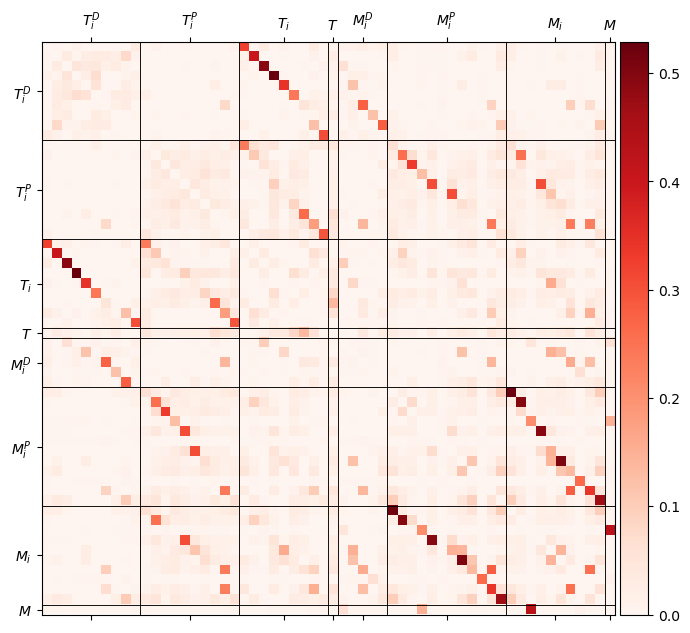

In [191]:

fig, ax = plt.subplots(1,1,figsize=(7,7))
r = ax.matshow(G_dir, cmap = "Reds", vmin=0, aspect = "equal")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

labels_select = G_obs_labels

plt.colorbar(r, cax=cax)

bs = [0,10,20,29,30,35,47,57,58]
for idx1, b1 in enumerate(bs[:-1]):
    for idx2, b2 in enumerate(bs[:-1]):
        ax.add_patch(plt.Rectangle((b1-0.5, b2-0.5), bs[idx1+1] - b1,bs[idx2+1] - b2,fill = False,linewidth=.5))


centers = np.array(bs)
centers = (centers[1:] + centers[:-1])/2 -.5
ax.set_xticks(centers, ['$T^D_i$', '$T^P_i$', '$T_i$', '$T$','$M^D_i$', '$M^P_i$', '$M_i$', '$M$']);
ax.set_yticks(centers, ['$T^D_i$', '$T^P_i$', '$T_i$', '$T$','$M^D_i$', '$M^P_i$', '$M_i$', '$M$']);

fig.tight_layout()

# plt.savefig(figures_path + "Cycle data/G_dir complete - symmetric.pdf", bbox_inches='tight')
# plt.savefig(figures_path + "Cycle data/G_dir complete - symmetric.png", bbox_inches='tight')

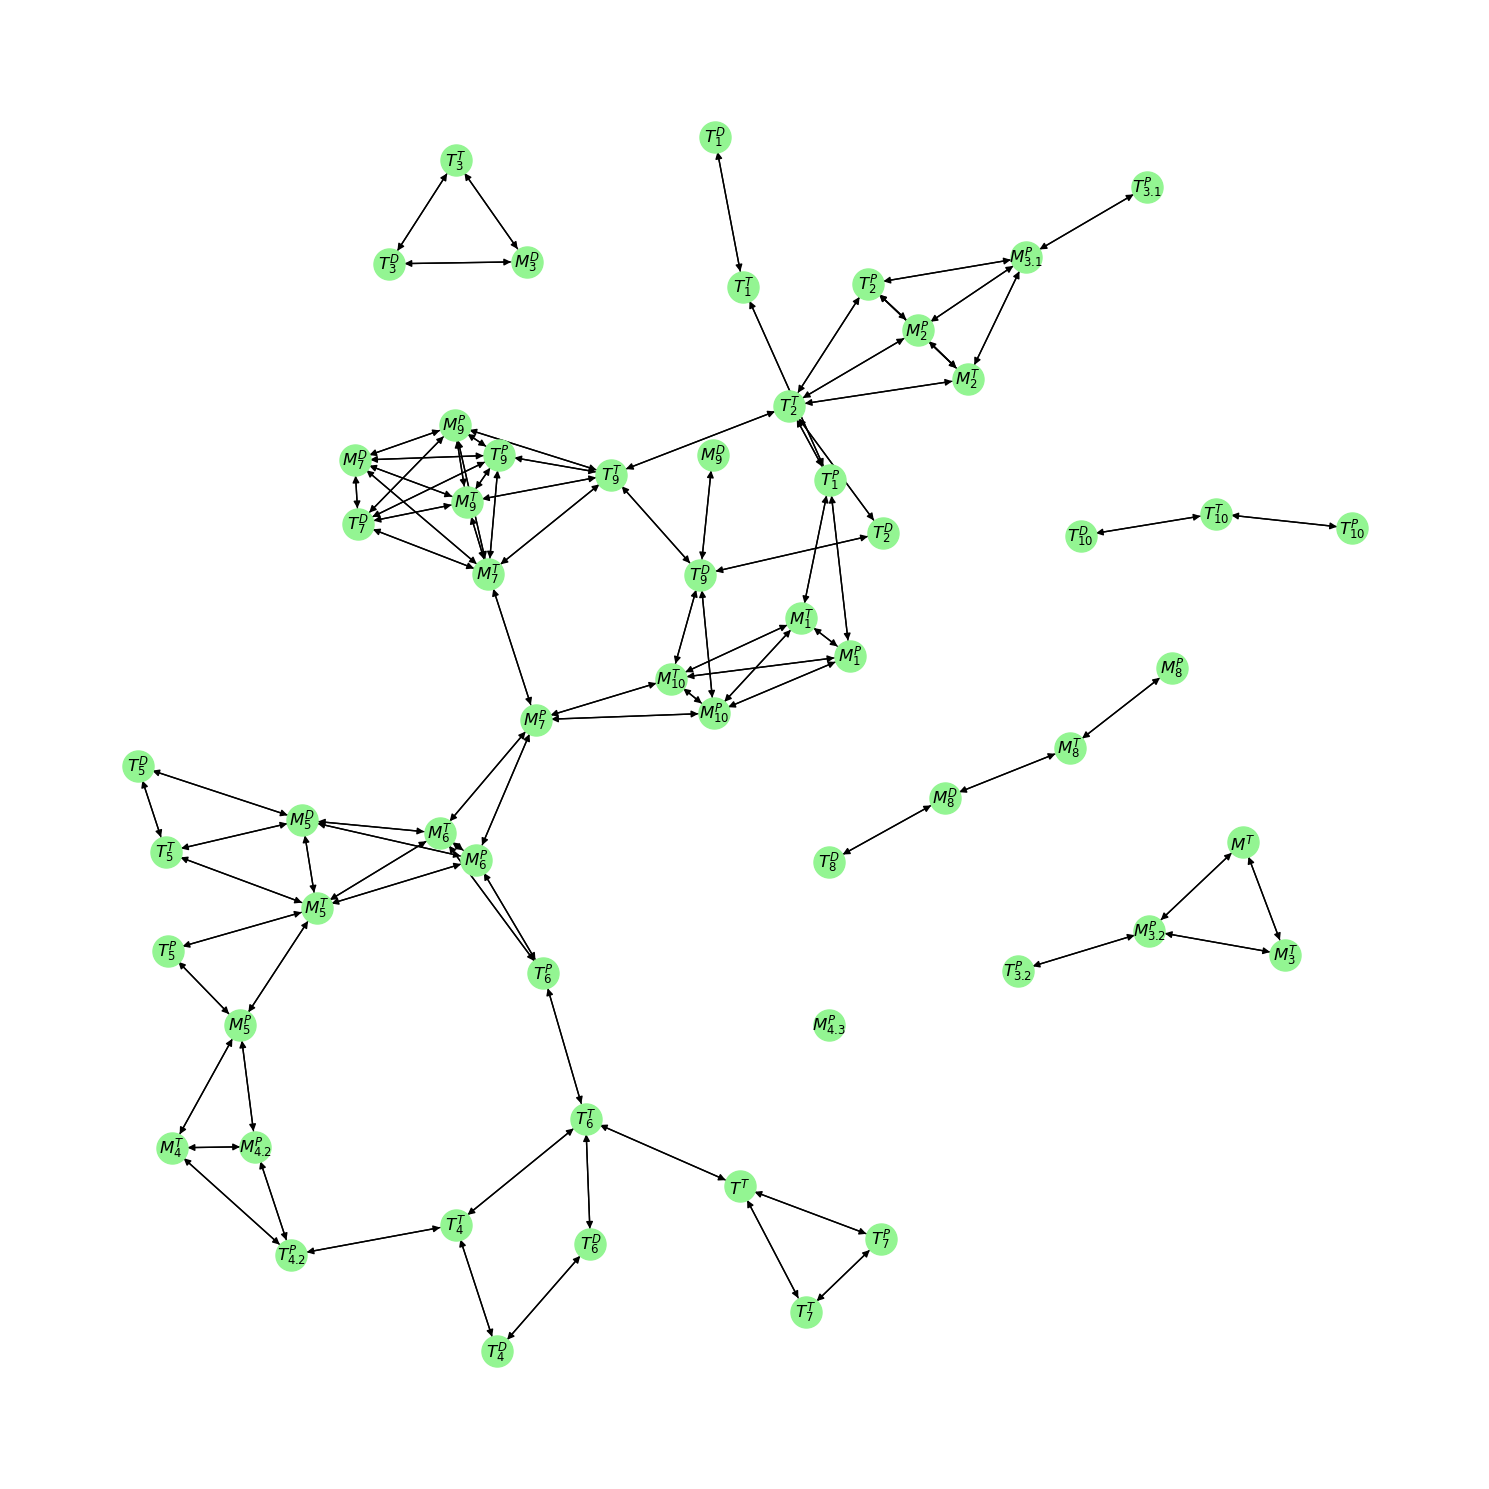

In [192]:
# graph plot
fig, ax = plt.subplots(1,1,figsize=(15,15))
gr = nx.from_numpy_array(G_dir > 0.06, create_using = nx.DiGraph)
pos = graphviz_layout(gr)
nx.draw(gr, pos = pos, node_size = 500, with_labels= True, ax = ax, node_color='#93F592', labels = { k:v for (k,v) in zip(range(d), G_obs_labels_latex)} )
fig.tight_layout()
# plt.savefig(figures_path + "ND examples/Gaussian network 10 - G_dir as graph - symmetric.pdf", bbox_inches='tight')

# Only times

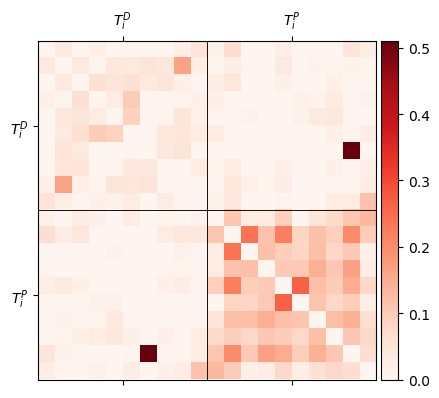

In [307]:
G_obs_times = G_obs.copy()
# temp = [idx_T_delay, idx_T_production, idx_T, idx_T_total]
temp = [idx_T_delay, idx_T_production]
bs = [i[0] for i in temp] + [temp[-1][-1]+1]
idx_times = np.concatenate(temp)
labels_select = G_obs_labels[idx_times]
G_obs_labels_latex_select = np.array(G_obs_labels_latex)[idx_times]

G_obs_times = G_obs_times[idx_times,:][:,idx_times]

G_dir = ND(G_obs_times)


fig, ax = plt.subplots(1,1,figsize=(4.5,4.5))
r = ax.matshow(G_dir, cmap = "Reds", vmin=0, aspect = "equal")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

# labels_select = G_obs_labels

plt.colorbar(r, cax=cax)


# bs = [0,10,20,29,30,35,47,57,58]
# bs = 
for idx1, b1 in enumerate(bs[:-1]):
    for idx2, b2 in enumerate(bs[:-1]):
        ax.add_patch(plt.Rectangle((b1-0.5, b2-0.5), bs[idx1+1] - b1,bs[idx2+1] - b2,fill = False,linewidth=.5))


centers = np.array(bs)
centers = (centers[1:] + centers[:-1])/2 -.5
# ['$T^D_i$', '$T^P_i$', '$T_i$', '$T$']
ax.set_xticks(centers, ['$T^D_i$', '$T^P_i$']);
ax.set_yticks(centers, ['$T^D_i$', '$T^P_i$']);

fig.tight_layout()

# plt.savefig(figures_path + "Cycle data/G_dir times - symmetric.pdf", bbox_inches='tight')
# plt.savefig(figures_path + "Cycle data/G_dir times - symmetric.png", bbox_inches='tight')

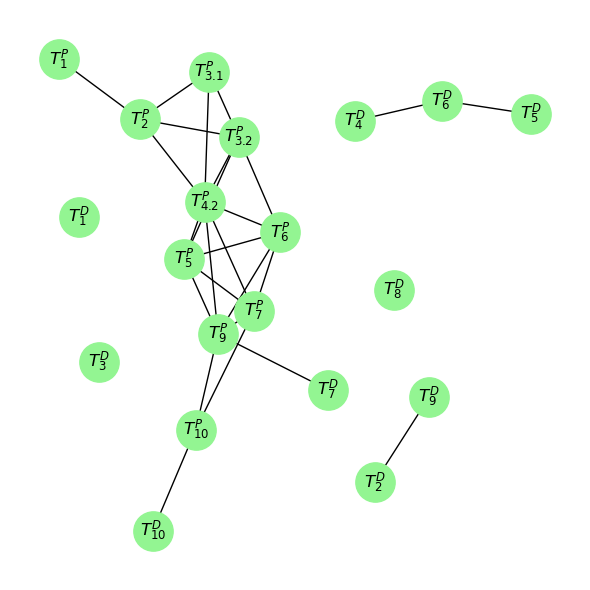

In [335]:
# graph plot
fig, ax = plt.subplots(1,1,figsize=(6,6))
labels = { k:v for (k,v) in zip(range(G_obs_labels_latex_select.__len__()), G_obs_labels_latex_select)} 
gr = nx.from_numpy_array(G_dir > 0.118, create_using = nx.DiGraph)
pos = graphviz_layout(gr)
nx.draw(gr, pos = pos, node_size = 800, with_labels= True, ax = ax, node_color='#93F592', labels = labels)
fig.tight_layout()
# plt.savefig(figures_path + "Cycle data/G_dir times as graph - symmetric - 0_118.pdf", bbox_inches='tight')

# symmetric G_dir times

In [324]:
order_times = [10,0,11,1,12,13,2,14,3,15,4,16,5,17,6,7,18,8,19,9]

In [325]:
labels_select[order_times]

array(['T_production_1', 'T_delay_1', 'T_production_2', 'T_delay_2',
       'T_production_3.1', 'T_production_3.2', 'T_delay_3',
       'T_production_4.2', 'T_delay_4', 'T_production_5', 'T_delay_5',
       'T_production_6', 'T_delay_6', 'T_production_7', 'T_delay_7',
       'T_delay_8', 'T_production_9', 'T_delay_9', 'T_production_10',
       'T_delay_10'], dtype=object)

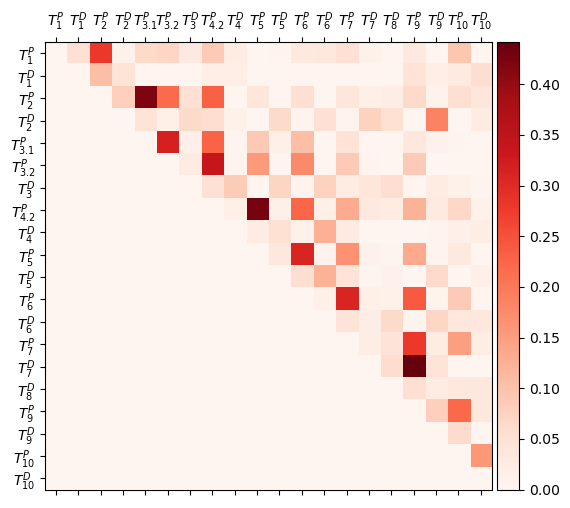

In [360]:
G_obs_times = G_obs.copy()
# temp = [idx_T_delay, idx_T_production, idx_T, idx_T_total]
temp = [idx_T_delay, idx_T_production]
# bs = [i[0] for i in temp] + [temp[-1][-1]+1]
idx_times = np.concatenate(temp)
labels_select = G_obs_labels[idx_times]
G_obs_labels_latex_select = np.array(G_obs_labels_latex)[idx_times]
G_obs_times = G_obs_times[idx_times,:][:,idx_times]


# Reorder to topological ordering
G_obs_times = G_obs_times[order_times,:][:,order_times]
labels_select = labels_select[order_times]
G_obs_labels_latex_select = G_obs_labels_latex_select[order_times]


G_obs_times = np.triu(G_obs_times)
G_dir = G_obs_times @ np.linalg.pinv(np.eye(G_obs_times.shape[0]) + G_obs_times)

# G_dir = ND(G_obs_times)

fig, ax = plt.subplots(1,1,figsize=(5.8,5.8))
r = ax.matshow(G_dir, cmap = "Reds", vmin=0, aspect = "equal")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

# labels_select = G_obs_labels

plt.colorbar(r, cax=cax)


# bs = [0,10,20,29,30,35,47,57,58]
# bs = 
# for idx1, b1 in enumerate(bs[:-1]):
#     for idx2, b2 in enumerate(bs[:-1]):
#         ax.add_patch(plt.Rectangle((b1-0.5, b2-0.5), bs[idx1+1] - b1,bs[idx2+1] - b2,fill = False,linewidth=.5))


# centers = np.array(bs)
# centers = (centers[1:] + centers[:-1])/2 -.5
# # ['$T^D_i$', '$T^P_i$', '$T_i$', '$T$']
# ax.set_xticks(centers, ['$T^D_i$', '$T^P_i$']);
# ax.set_yticks(centers, ['$T^D_i$', '$T^P_i$']);

ax.set_xticks(np.arange(G_obs_labels_latex_select.__len__()), G_obs_labels_latex_select)
ax.set_yticks(np.arange(G_obs_labels_latex_select.__len__()), G_obs_labels_latex_select)

fig.tight_layout()

# plt.savefig(figures_path + "Cycle data/G_dir times - directed.pdf", bbox_inches='tight')
# plt.savefig(figures_path + "Cycle data/G_dir times - directed.png", bbox_inches='tight')

In [365]:
G_dir[3]

array([-2.49905495e-17,  5.34534415e-17, -6.36140930e-17,  3.89024406e-16,
        4.60123418e-02,  1.70032063e-02,  6.25652181e-02,  5.70401497e-02,
        1.16824902e-02, -7.16801451e-03,  6.23192026e-02,  4.07420355e-03,
        5.05240342e-02,  2.90088801e-03,  7.47627894e-02,  5.20806835e-02,
       -3.85589867e-03,  1.84530197e-01,  4.47512970e-04,  2.54826863e-02])

In [366]:
labels

{0: '$T^P_{1}$',
 1: '$T^D_{1}$',
 2: '$T^P_{2}$',
 3: '$T^D_{2}$',
 4: '$T^P_{3.1}$',
 5: '$T^P_{3.2}$',
 6: '$T^D_{3}$',
 7: '$T^P_{4.2}$',
 8: '$T^D_{4}$',
 9: '$T^P_{5}$',
 10: '$T^D_{5}$',
 11: '$T^P_{6}$',
 12: '$T^D_{6}$',
 13: '$T^P_{7}$',
 14: '$T^D_{7}$',
 15: '$T^D_{8}$',
 16: '$T^P_{9}$',
 17: '$T^D_{9}$',
 18: '$T^P_{10}$',
 19: '$T^D_{10}$'}

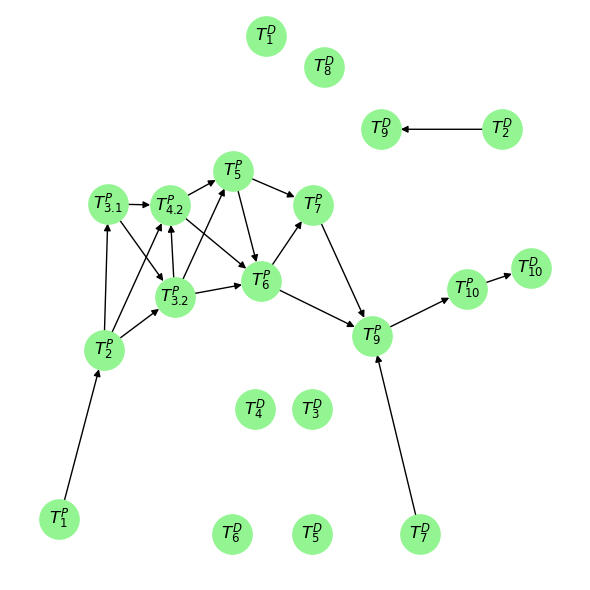

In [364]:
# graph plot
fig, ax = plt.subplots(1,1,figsize=(6,6))
labels = { k:v for (k,v) in zip(range(G_obs_labels_latex_select.__len__()), G_obs_labels_latex_select)} 
gr = nx.from_numpy_array(G_dir > 0.15, create_using = nx.DiGraph)
pos = graphviz_layout(gr, "sfdp")
# sfdp
nx.draw(gr, pos = pos, node_size = 800, with_labels= True, ax = ax, node_color='#93F592', labels = labels)
fig.tight_layout()
# plt.savefig(figures_path + "Cycle data/G_dir times as graph - directed - 0_15.pdf", bbox_inches='tight')

# Almost triangular G_dir - times and masses

In [398]:
# select imtes and masses of individual processes
temp = [idx_T_production, idx_T_delay, idx_M_production, idx_M_delay]
idx_select = np.concatenate(temp)


G_obs_labels_select = G_obs_labels[idx_select]
G_obs_labels_latex_select = np.array(G_obs_labels_latex)[idx_select]
G_obs_timeAndMass = G_obs.copy()
G_obs_timeAndMass = G_obs_timeAndMass[idx_select,:][:,idx_select]

In [399]:
order = [ 0,      20,      10,
          1,      21,      11,
          2, 22,  3,23,    12,    32,
          4,      24,25,   13,
          5,      26,      14,    33,
          6,      27,      15,
          7,      28,      16,    34,
                  29,      17,    35,
          8,      30,      18,    36,
          9,      31,      19]

G_obs_labels_select = G_obs_labels_select[order]
G_obs_labels_latex_select = G_obs_labels_latex_select[order]
G_obs_timeAndMass = G_obs_timeAndMass[order,:][:,order]

In [442]:
def FindProcess(s):
    idx = s.rfind("_")
    return s[idx+1:]

def FindProcess_with_type(s):
    return s[2:]

bs = np.where([ FindProcess(l) != FindProcess(G_obs_labels_select[idx]) for  idx, l in enumerate(G_obs_labels_select[1:])])[0]+1
bs = np.concatenate([[0],bs, [G_obs_labels_select.__len__()]])

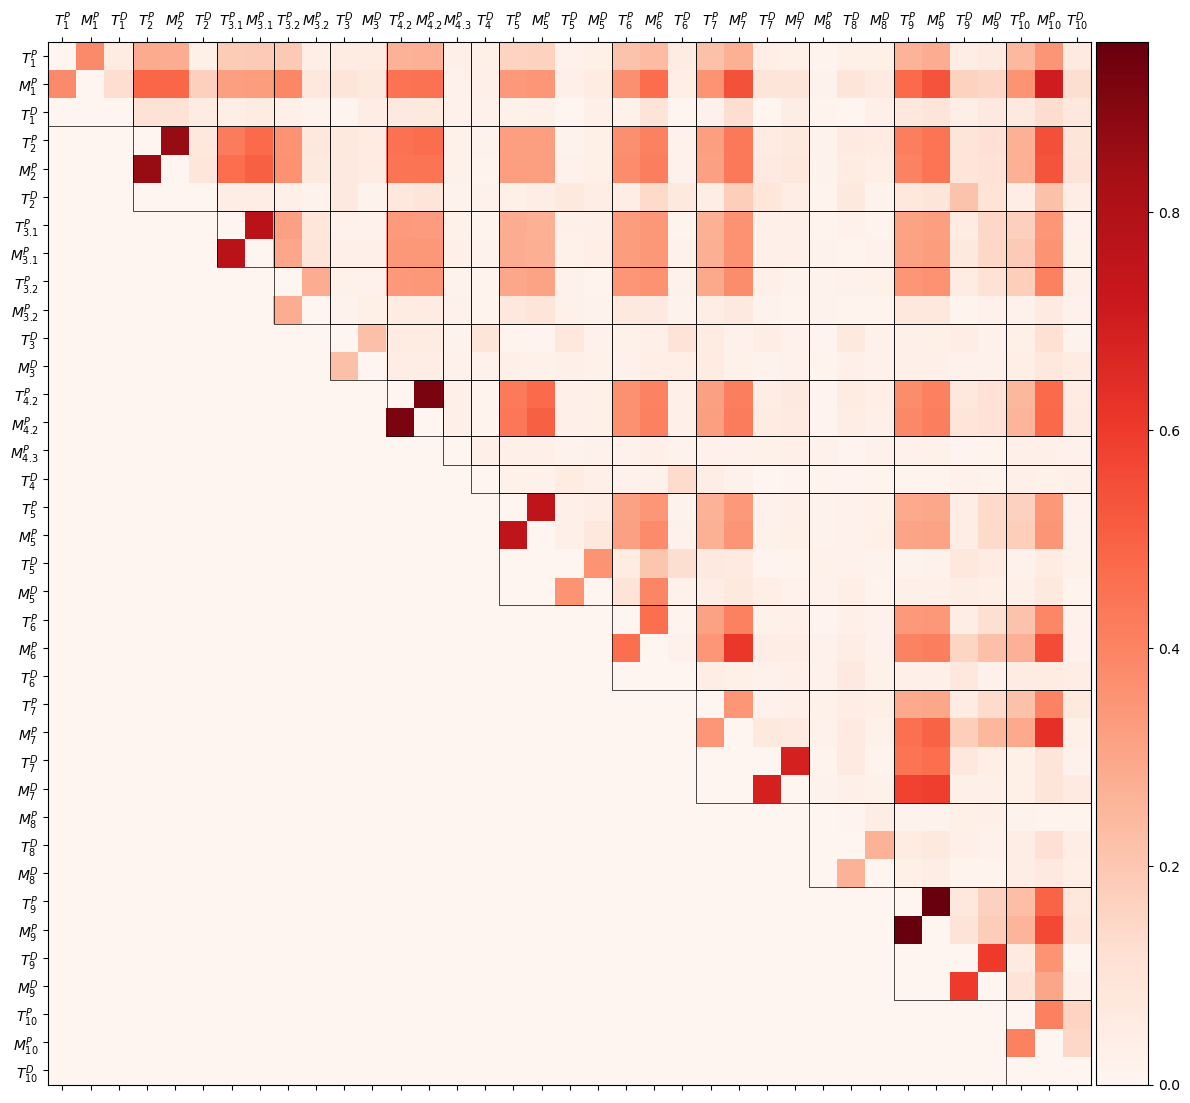

In [446]:
G_obs_timeAndMass_tri = G_obs_timeAndMass.copy()

for idx1 in range(G_obs_timeAndMass_tri.shape[0]):
    for idx2 in range(G_obs_timeAndMass_tri.shape[1]):
        if idx1 > idx2:
            if FindProcess_with_type(G_obs_labels_select[idx1]) != FindProcess_with_type(G_obs_labels_select[idx2]):
                G_obs_timeAndMass_tri[idx1,idx2] = 0
            

fig, ax = plt.subplots(1,1,figsize=(12,12))
r = ax.matshow(G_obs_timeAndMass_tri, cmap = "Reds", vmin=0, aspect = "equal")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(r, cax=cax)



# Draw rectangles
for idx1, b1 in enumerate(bs[:-1]):
    for idx2, b2 in enumerate(bs[:-1]):
        if idx1 >= idx2:
            ax.add_patch(plt.Rectangle((b1-0.5, b2-0.5), bs[idx1+1] - b1,bs[idx2+1] - b2,fill = False,linewidth=.5))
        # else:
        #     G_obs_timeAndMass_tri[b1:(bs[idx1+1]),b2:(bs[idx2+1])] = 0


# centers = np.array(bs)
# centers = (centers[1:] + centers[:-1])/2 -.5
# # ['$T^D_i$', '$T^P_i$', '$T_i$', '$T$']
# ax.set_xticks(centers, np.arange());
# ax.set_yticks(centers, ['$T^D_i$', '$T^P_i$']);

ax.set_xticks(np.arange(G_obs_labels_latex_select.__len__()), G_obs_labels_latex_select)
ax.set_yticks(np.arange(G_obs_labels_latex_select.__len__()), G_obs_labels_latex_select)

fig.tight_layout()


In [450]:
if np.linalg.eig(G_obs_timeAndMass_tri).eigenvalues.min() <= -0.5:
    G_obs_timeAndMass_tri = - G_obs_timeAndMass_tri / np.linalg.eig(G_obs_timeAndMass_tri).eigenvalues.min() * 0.49

In [451]:
G_dir = G_obs_timeAndMass_tri @ np.linalg.pinv(np.eye(G_obs_timeAndMass_tri.shape[0]) + G_obs_timeAndMass_tri)

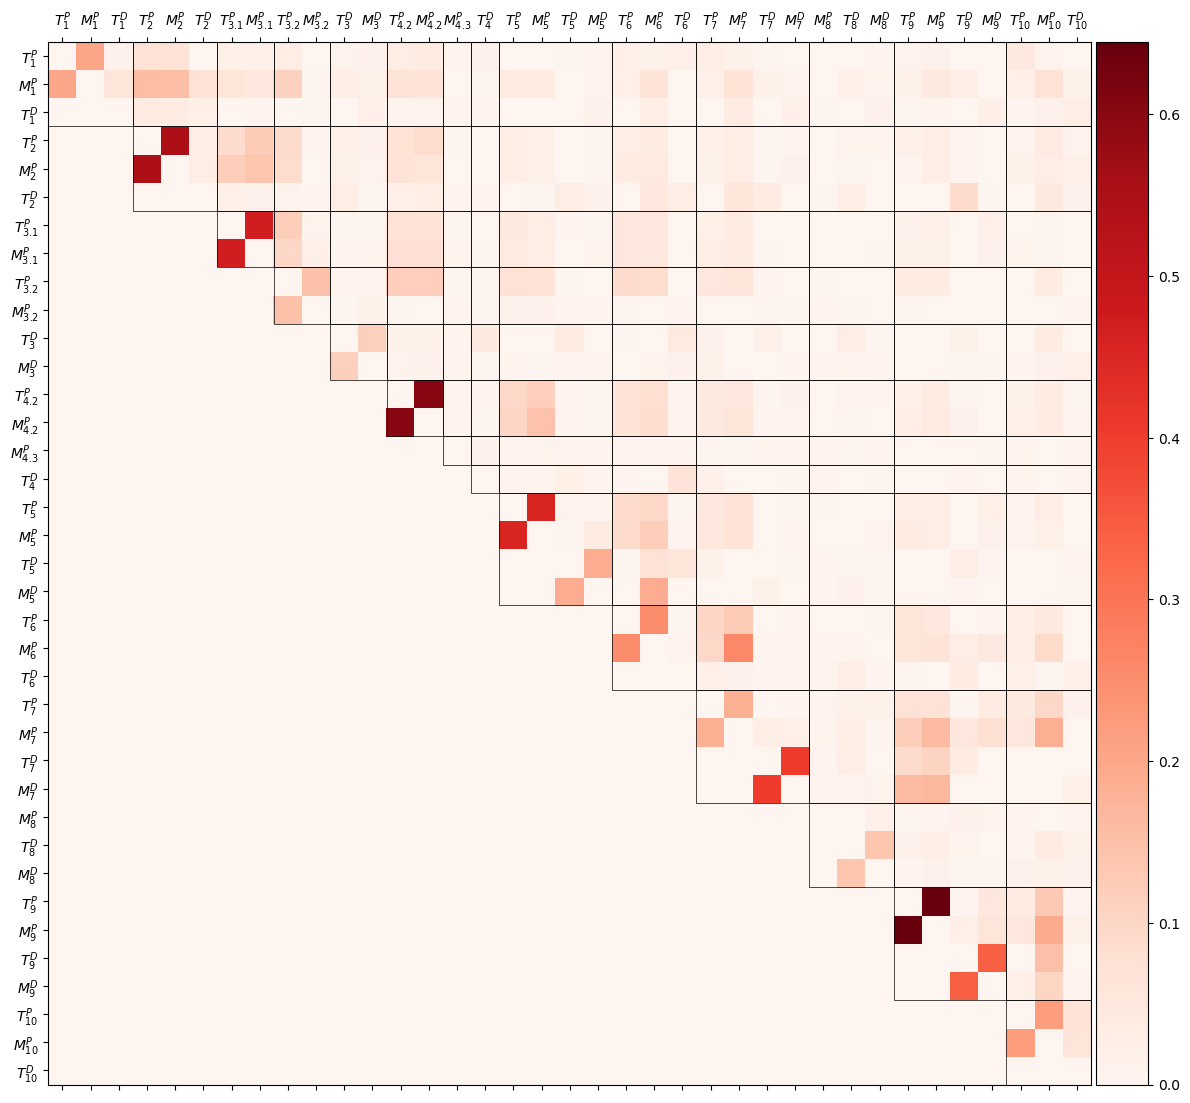

In [452]:
fig, ax = plt.subplots(1,1,figsize=(12,12))
r = ax.matshow(G_dir, cmap = "Reds", vmin=0, aspect = "equal")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(r, cax=cax)



# Draw rectangles
for idx1, b1 in enumerate(bs[:-1]):
    for idx2, b2 in enumerate(bs[:-1]):
        if idx1 >= idx2:
            ax.add_patch(plt.Rectangle((b1-0.5, b2-0.5), bs[idx1+1] - b1,bs[idx2+1] - b2,fill = False,linewidth=.5))
        # else:
        #     G_obs_timeAndMass_tri[b1:(bs[idx1+1]),b2:(bs[idx2+1])] = 0


# centers = np.array(bs)
# centers = (centers[1:] + centers[:-1])/2 -.5
# # ['$T^D_i$', '$T^P_i$', '$T_i$', '$T$']
# ax.set_xticks(centers, np.arange());
# ax.set_yticks(centers, ['$T^D_i$', '$T^P_i$']);

ax.set_xticks(np.arange(G_obs_labels_latex_select.__len__()), G_obs_labels_latex_select)
ax.set_yticks(np.arange(G_obs_labels_latex_select.__len__()), G_obs_labels_latex_select)

fig.tight_layout()


# Quick plot of observations

In [314]:
D4 = OBSERVATIONS_TRANSFORMED["T_production_7"]
P4 = OBSERVATIONS_TRANSFORMED["T_production_9"]
# T4 = OBSERVATIONS_TRANSFORMED["T_4"]

# D4 = OBSERVATIONS_TRANSFORMED["M_production_1"]
# P4 = OBSERVATIONS_TRANSFORMED["M_1"]


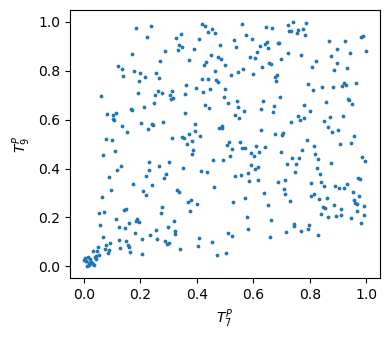

In [318]:
# fig, ax = plt.subplots(1,1,figsize=(4,3.5))
# ax.scatter(P4,T4, s = 3)
# ax.set_xlabel('$T^P_{4.2}$')
# ax.set_ylabel('$T_{4}$')
# fig.tight_layout()
# # plt.savefig(figures_path + "Cycle data/G_dir complete - symmetric - TP4 vs T4.pdf", bbox_inches='tight')


# fig, ax = plt.subplots(1,1,figsize=(4,3.5))
# ax.scatter(D4, T4,s = 3)
# ax.set_xlabel('$T^D_{4}$')
# ax.set_ylabel('$T_{4}$')
# fig.tight_layout()
# # plt.savefig(figures_path + "Cycle data/G_dir complete - symmetric - TD4 vs T4.pdf", bbox_inches='tight')


fig, ax = plt.subplots(1,1,figsize=(4,3.5))
ax.scatter(D4, P4,s = 3)
ax.set_xlabel('$T^P_{7}$')
ax.set_ylabel('$T^P_{9}$')
fig.tight_layout()
# plt.savefig(figures_path + "Cycle data/G_dir times - symmetric - TP9 vs TP7.pdf", bbox_inches='tight')